In [1]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

In [2]:
# Information about mnist dataset
IMG_ROWS = 28
IMG_COLS = 28
IMG_CHANNELS = 1
CLASSES = 10        # from 0 to 9

In [3]:
# Load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
X_train: (60000, 28, 28)
y_train: (60000,)
X_test: (10000, 28, 28)
y_test: (10000,)


In [4]:
# Reshape images
X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

In [5]:
# Normalize images
X_train = X_train / 255.0
X_test = X_test / 255.0

In [7]:
# Change data type
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [8]:
# Convert class vectors into binary
y_train = to_categorical(y_train, CLASSES)
y_test = to_categorical(y_test, CLASSES)

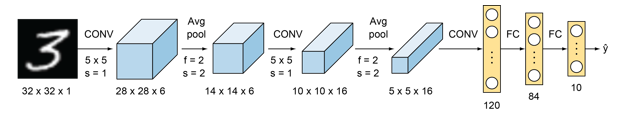

In [9]:
# Build model
def build_model(input_shape, classes):
    model = Sequential()
    model.add(Conv2D(filters=6, kernel_size=5, activation='tanh', padding='same', input_shape=input_shape))
    model.add(AveragePooling2D(pool_size=(2, 2)))
    model.add(Conv2D(filters=16, kernel_size=5, activation='tanh'))
    model.add(AveragePooling2D(pool_size=(2, 2)))
    model.add(Conv2D(120, kernel_size=5, activation='tanh'))
    model.add(Flatten())
    model.add(Dense(84, activation='tanh'))
    model.add(Dense(classes, activation='softmax'))
    return model

In [10]:
# Initialize model
model = build_model(input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS), classes=CLASSES)
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (Average  (None, 14, 14, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 5, 5, 16)          0         
 gePooling2D)                                                    
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 120)               0

In [11]:
# Fit the model
history = model.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1, validation_split=0.1)

Epoch 1/20
422/422 [==============================] - 33s 75ms/step - loss: 0.3618 - accuracy: 0.8953 - val_loss: 0.1429 - val_accuracy: 0.9605
Epoch 2/20
422/422 [==============================] - 29s 68ms/step - loss: 0.1397 - accuracy: 0.9575 - val_loss: 0.0859 - val_accuracy: 0.9755
Epoch 3/20
422/422 [==============================] - 29s 68ms/step - loss: 0.0913 - accuracy: 0.9729 - val_loss: 0.0743 - val_accuracy: 0.9777
Epoch 4/20
422/422 [==============================] - 29s 70ms/step - loss: 0.0665 - accuracy: 0.9794 - val_loss: 0.0702 - val_accuracy: 0.9792
Epoch 5/20
422/422 [==============================] - 30s 70ms/step - loss: 0.0535 - accuracy: 0.9831 - val_loss: 0.0607 - val_accuracy: 0.9827
Epoch 6/20
422/422 [==============================] - 29s 68ms/step - loss: 0.0407 - accuracy: 0.9874 - val_loss: 0.0527 - val_accuracy: 0.9845
Epoch 7/20
422/422 [==============================] - 28s 67ms/step - loss: 0.0336 - accuracy: 0.9893 - val_loss: 0.0594 - val_accuracy:

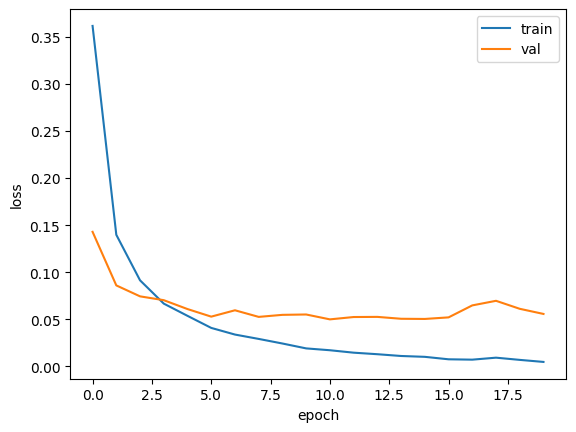

In [12]:
# Visualize train loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

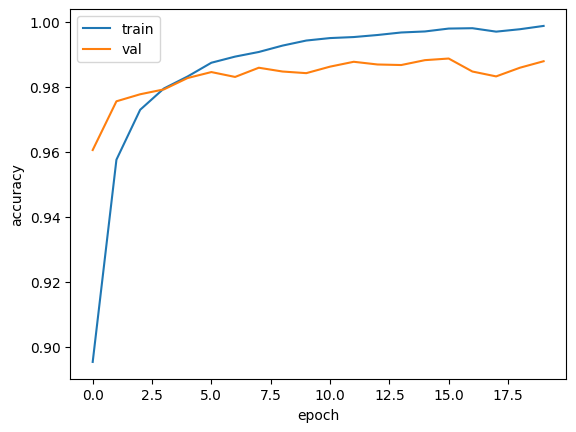

In [13]:
# Visualize train accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'val'])
plt.show()

In [14]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
print(f'Test loss: {test_loss:.4f}')
print(f'Test accuracy: {test_acc:.4f}')

313/313 [==============================] - 3s 10ms/step - loss: 0.0497 - accuracy: 0.9868
Test loss: 0.0497
Test accuracy: 0.9868
